In [3]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)
black = '#000000'
yellow = '#F0F442'
orange = '#ec7f31'
#gold = '#E69F00'
gold = '#f0bd24'
green = '#009E73'
dblue = '#0072B2'
lblue = '#56B4E9'
pink = '#F6BBCA'
red = '#FF3442'
purple = '#4f0069'
lgreen = '#00ff99'
c = [purple, red, orange, gold, yellow, green, lgreen, dblue, lblue, pink]
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]

In [73]:
filedir = '/gpfs/amarolab/monolayers/sasa_SA19'
#import total_sasa.xvg data
total_sasa = np.genfromtxt(filedir+'/total_sasa.xvg', skip_header=24)
#import solv_energy.xvg data
solv_nrg = np.genfromtxt(filedir+'/solv_energy.xvg', skip_header=24)
#import sasa_per_residue.xvg
sasa_per_res = np.genfromtxt(filedir+'/sasa_per_residue.xvg', skip_header=25)

#appending data from total_sasa
a = []
b = []
a.append(total_sasa[:,0]/1000)
print(a)
b.append(total_sasa[:,1]*100)
print(b)

#appending data from solv_nrg
c = []
d = []
c.append(solv_nrg[:,0]/1000)
d.append(solv_nrg[:,1])
print(c)
print(d)

#appending data from sasa_per_res
e = []
f = []
err = []
e.append(sasa_per_res[:,0])
f.append(sasa_per_res[:,1])
err.append(sasa_per_res[:,2])
print(e)
print(f)
print(err)

[array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1898e+02, 1.1899e+02,
       1.1900e+02])]
[array([23770.8, 23632.8, 23980.5, ..., 22273.9, 22803.8, 22666.6])]
[array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1898e+02, 1.1899e+02,
       1.1900e+02])]
[array([-35.676, -47.296, -40.135, ..., -42.004, -38.635, -40.149])]
[array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101

85.6359649122807
57.123684210526314
37.687012987012984
34.12162162162162


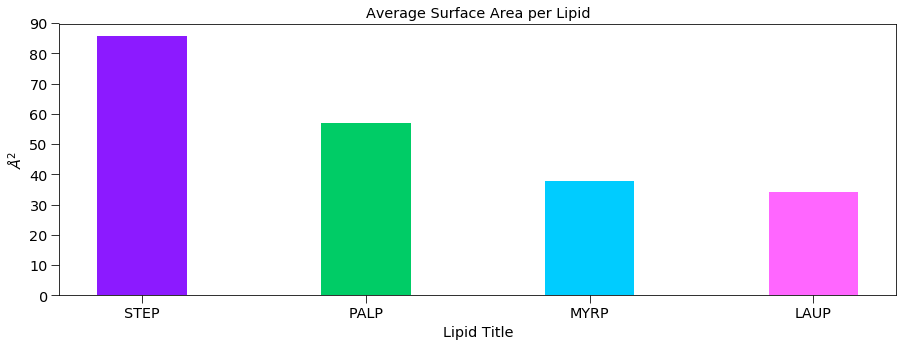

In [60]:
#plotting the average of each residue 
#STE
g = []
h = []
g.append(e[0][0:114])
#print(g)
h.append(f[0][0:114])
#print(h)
avg_STEP = np.mean(h)*100
print(avg_STEP)

#PALP
i = []
j = []
i.append(e[0][114:266])
#print(i)
j.append(f[0][114:266])
#print(j)
avg_PALP = np.mean(j)*100
print(avg_PALP)

#MYRP 
k = []
l = []
k.append(e[0][266:343])
#print(k)
l.append(f[0][266:343])
#print(l)
avg_MYRP = np.mean(l)*100
print(avg_MYRP)

#LAUP
m = []
n = []
m.append(e[0][343:380])
#print(m)
n.append(f[0][343:380])
#print(n)
avg_LAUP = np.mean(n)*100
print(avg_LAUP)

x_values = [2, 4, 6, 8]
plt.xticks([2, 4, 6, 8], ('STEP', 'PALP', 'MYRP', 'LAUP'))
plt.title('Average Surface Area per Lipid')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('Lipid Title')

plt.bar(x_values[0], avg_STEP, color=pal[1])
plt.bar(x_values[1], avg_PALP, color=pal[2])
plt.bar(x_values[2], avg_MYRP, color=pal[3])
plt.bar(x_values[3], avg_LAUP, color=pal[4])

plt.savefig('/home/drez/Desktop/avg_surface_area_per_lipid.png', dpi=300)

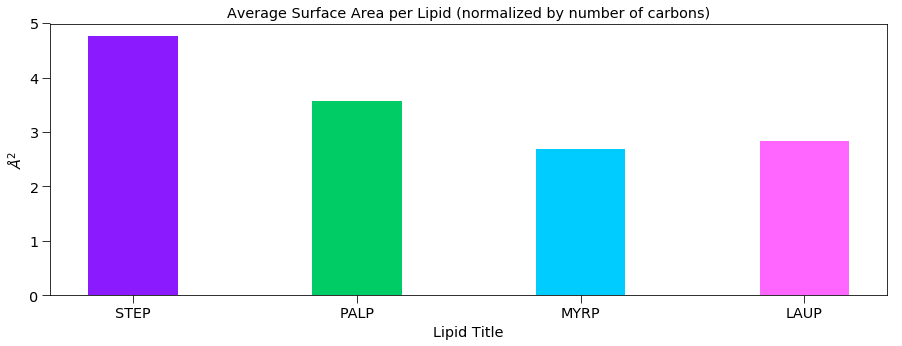

In [61]:
#Remake plot normalized by # of C
x_values = [2, 4, 6, 8]
plt.xticks([2, 4, 6, 8], ('STEP', 'PALP', 'MYRP', 'LAUP'))
plt.title('Average Surface Area per Lipid (normalized by number of carbons)')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('Lipid Title')

norm_STEP = avg_STEP/18
norm_PALP = avg_PALP/16
norm_MYRP = avg_MYRP/14
norm_LAUP = avg_LAUP/12
plt.bar(x_values[0], norm_STEP, color=pal[1])
plt.bar(x_values[1], norm_PALP, color=pal[2])
plt.bar(x_values[2], norm_MYRP, color=pal[3])
plt.bar(x_values[3], norm_LAUP, color=pal[4])

plt.savefig('/home/drez/Desktop/norm_avg_surface_area_per_lipid.png', dpi=300)

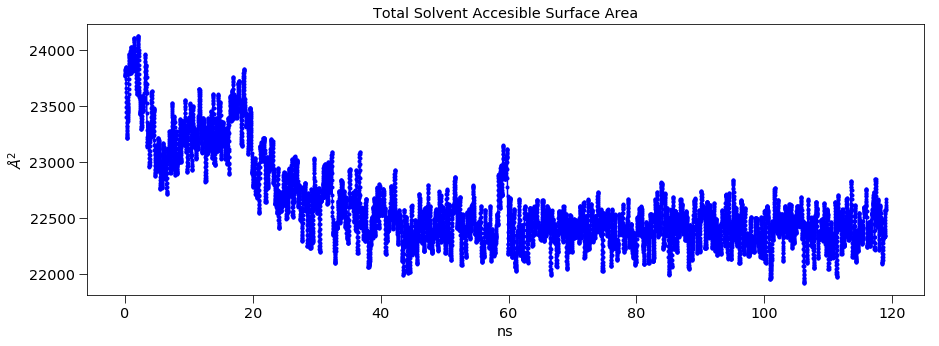

In [79]:
#total SASA
import scipy.signal as signal 

N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, b)

plt.title('Total Solvent Accesible Surface Area')
plt.ylabel(r'$\AA$''$^2$')
plt.xlabel('ns')

plt.errorbar(a, smooth_data, color=pal[0], marker='.')
plt.savefig('/home/drez/Desktop/total_SASA.png', dpi=300)